<a href="https://colab.research.google.com/github/Sainikithaharish06/project-work/blob/main/hepatitis3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Here our data is based on logistic model


The logistic classification model (or logit model) is a binary classification model in which the conditional probability of one of the two possible realizations of the output variable is assumed to be equal to a linear combination of the input variables, transformed by the logistic function.

PROJECT IS BASED ON HEPATITS TO PREDICT CLASS


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from matplotlib import pyplot as plt

In [ ]:
null_values=["?",]

In [ ]:
dataset=pd.read_csv("hepatitis dataset.csv",index_col=False,na_values=null_values,
                    names=["CLASS","AGE","SEX","SETROID","ANTIVIRAL","FATIGUE","MALASIA","ANOREXIA","LIVER BIG","LIVER FIRM",
                                                   "SPLEEN PALPABLE","SPIDERS","ASCITES","VARICES","BILIRUBIN","ALK PHOSPHATE","SGOT","ALBUMIN",
                                                   "PROTIME","HISTOLOGY"])                                            

In [ ]:
dataset

,CLASS,AGE,SEX,SETROID,ANTIVIRAL,FATIGUE,MALASIA,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,2,30,2,1.0,2,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,85.0,18.0,4.0,NaN,1
1,2,50,1,1.0,2,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,0.9,135.0,42.0,3.5,NaN,1
2,2,78,1,2.0,2,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,96.0,32.0,4.0,NaN,1
3,2,31,1,NaN,1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,46.0,52.0,4.0,80.0,1
4,2,34,1,2.0,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN,200.0,4.0,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,1,46,1,2.0,2,1.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,7.6,NaN,242.0,3.3,50.0,2
151,2,44,1,2.0,2,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,0.9,126.0,142.0,4.3,NaN,2
152,2,61,1,1.0,2,1.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,0.8,75.0,20.0,4.1,NaN,2
153,2,53,2,1.0,2,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.5,81.0,19.0,4.1,48.0,2


In [ ]:
dataset.shape

(155, 20)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CLASS            155 non-null    int64  
 1   AGE              155 non-null    int64  
 2   SEX              155 non-null    int64  
 3   SETROID          154 non-null    float64
 4   ANTIVIRAL        155 non-null    int64  
 5   FATIGUE          154 non-null    float64
 6   MALASIA          154 non-null    float64
 7   ANOREXIA         154 non-null    float64
 8   LIVER BIG        145 non-null    float64
 9   LIVER FIRM       144 non-null    float64
 10  SPLEEN PALPABLE  150 non-null    float64
 11  SPIDERS          150 non-null    float64
 12  ASCITES          150 non-null    float64
 13  VARICES          150 non-null    float64
 14  BILIRUBIN        149 non-null    float64
 15  ALK PHOSPHATE    126 non-null    float64
 16  SGOT             151 non-null    float64
 17  ALBUMIN         

In [ ]:
dataset.describe()

,CLASS,AGE,SEX,SETROID,ANTIVIRAL,FATIGUE,MALASIA,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
count,155.000000,155.000000,155.000000,154.000000,155.000000,154.000000,154.000000,154.000000,145.000000,144.000000,150.00000,150.000000,150.000000,150.00000,149.000000,126.000000,151.00000,139.000000,88.000000,155.000000
mean,1.793548,41.200000,1.103226,1.506494,1.845161,1.350649,1.603896,1.792208,1.827586,1.583333,1.80000,1.660000,1.866667,1.88000,1.427517,105.325397,85.89404,3.817266,61.852273,1.451613
std,0.406070,12.565878,0.305240,0.501589,0.362923,0.478730,0.490682,0.407051,0.379049,0.494727,0.40134,0.475296,0.341073,0.32605,1.212149,51.508109,89.65089,0.651523,22.875244,0.499266
min,1.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.00000,0.300000,26.000000,14.00000,2.100000,0.000000,1.000000
25%,2.000000,32.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.00000,1.000000,2.000000,2.00000,0.700000,74.250000,31.50000,3.400000,46.000000,1.000000
50%,2.000000,39.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.00000,1.000000,85.000000,58.00000,4.000000,61.000000,1.000000
75%,2.000000,50.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.00000,1.500000,132.250000,100.50000,4.200000,76.250000,2.000000
max,2.000000,78.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.00000,8.000000,295.000000,648.00000,6.400000,100.000000,2.000000


In [ ]:
dataset.isna().sum()

CLASS               0
AGE                 0
SEX                 0
SETROID             1
ANTIVIRAL           0
FATIGUE             1
MALASIA             1
ANOREXIA            1
LIVER BIG          10
LIVER FIRM         11
SPLEEN PALPABLE     5
SPIDERS             5
ASCITES             5
VARICES             5
BILIRUBIN           6
ALK PHOSPHATE      29
SGOT                4
ALBUMIN            16
PROTIME            67
HISTOLOGY           0
dtype: int64

In [ ]:
#replacing missing values
continuous_features = ["AGE","ALK PHOSPHATE",	"SGOT",	"ALBUMIN"	,"PROTIME"]
for column in continuous_features:
    dataset[column]=dataset[column].fillna(dataset[column].mean())

for column in dataset.columns.drop(continuous_features):
    dataset[column]=dataset[column].fillna(dataset[column].mode().sample(1,random_state=1).values[0])

In [ ]:
dataset.value_counts

<bound method DataFrame.value_counts of      CLASS  AGE  SEX  SETROID  ANTIVIRAL  FATIGUE  MALASIA  ANOREXIA  \
0        2   30    2      1.0          2      2.0      2.0       2.0   
1        2   50    1      1.0          2      1.0      2.0       2.0   
2        2   78    1      2.0          2      1.0      2.0       2.0   
3        2   31    1      2.0          1      2.0      2.0       2.0   
4        2   34    1      2.0          2      2.0      2.0       2.0   
..     ...  ...  ...      ...        ...      ...      ...       ...   
150      1   46    1      2.0          2      1.0      1.0       1.0   
151      2   44    1      2.0          2      1.0      2.0       2.0   
152      2   61    1      1.0          2      1.0      1.0       2.0   
153      2   53    2      1.0          2      1.0      2.0       2.0   
154      1   43    1      2.0          2      1.0      2.0       2.0   

     LIVER BIG  LIVER FIRM  SPLEEN PALPABLE  SPIDERS  ASCITES  VARICES  \
0          1.0       

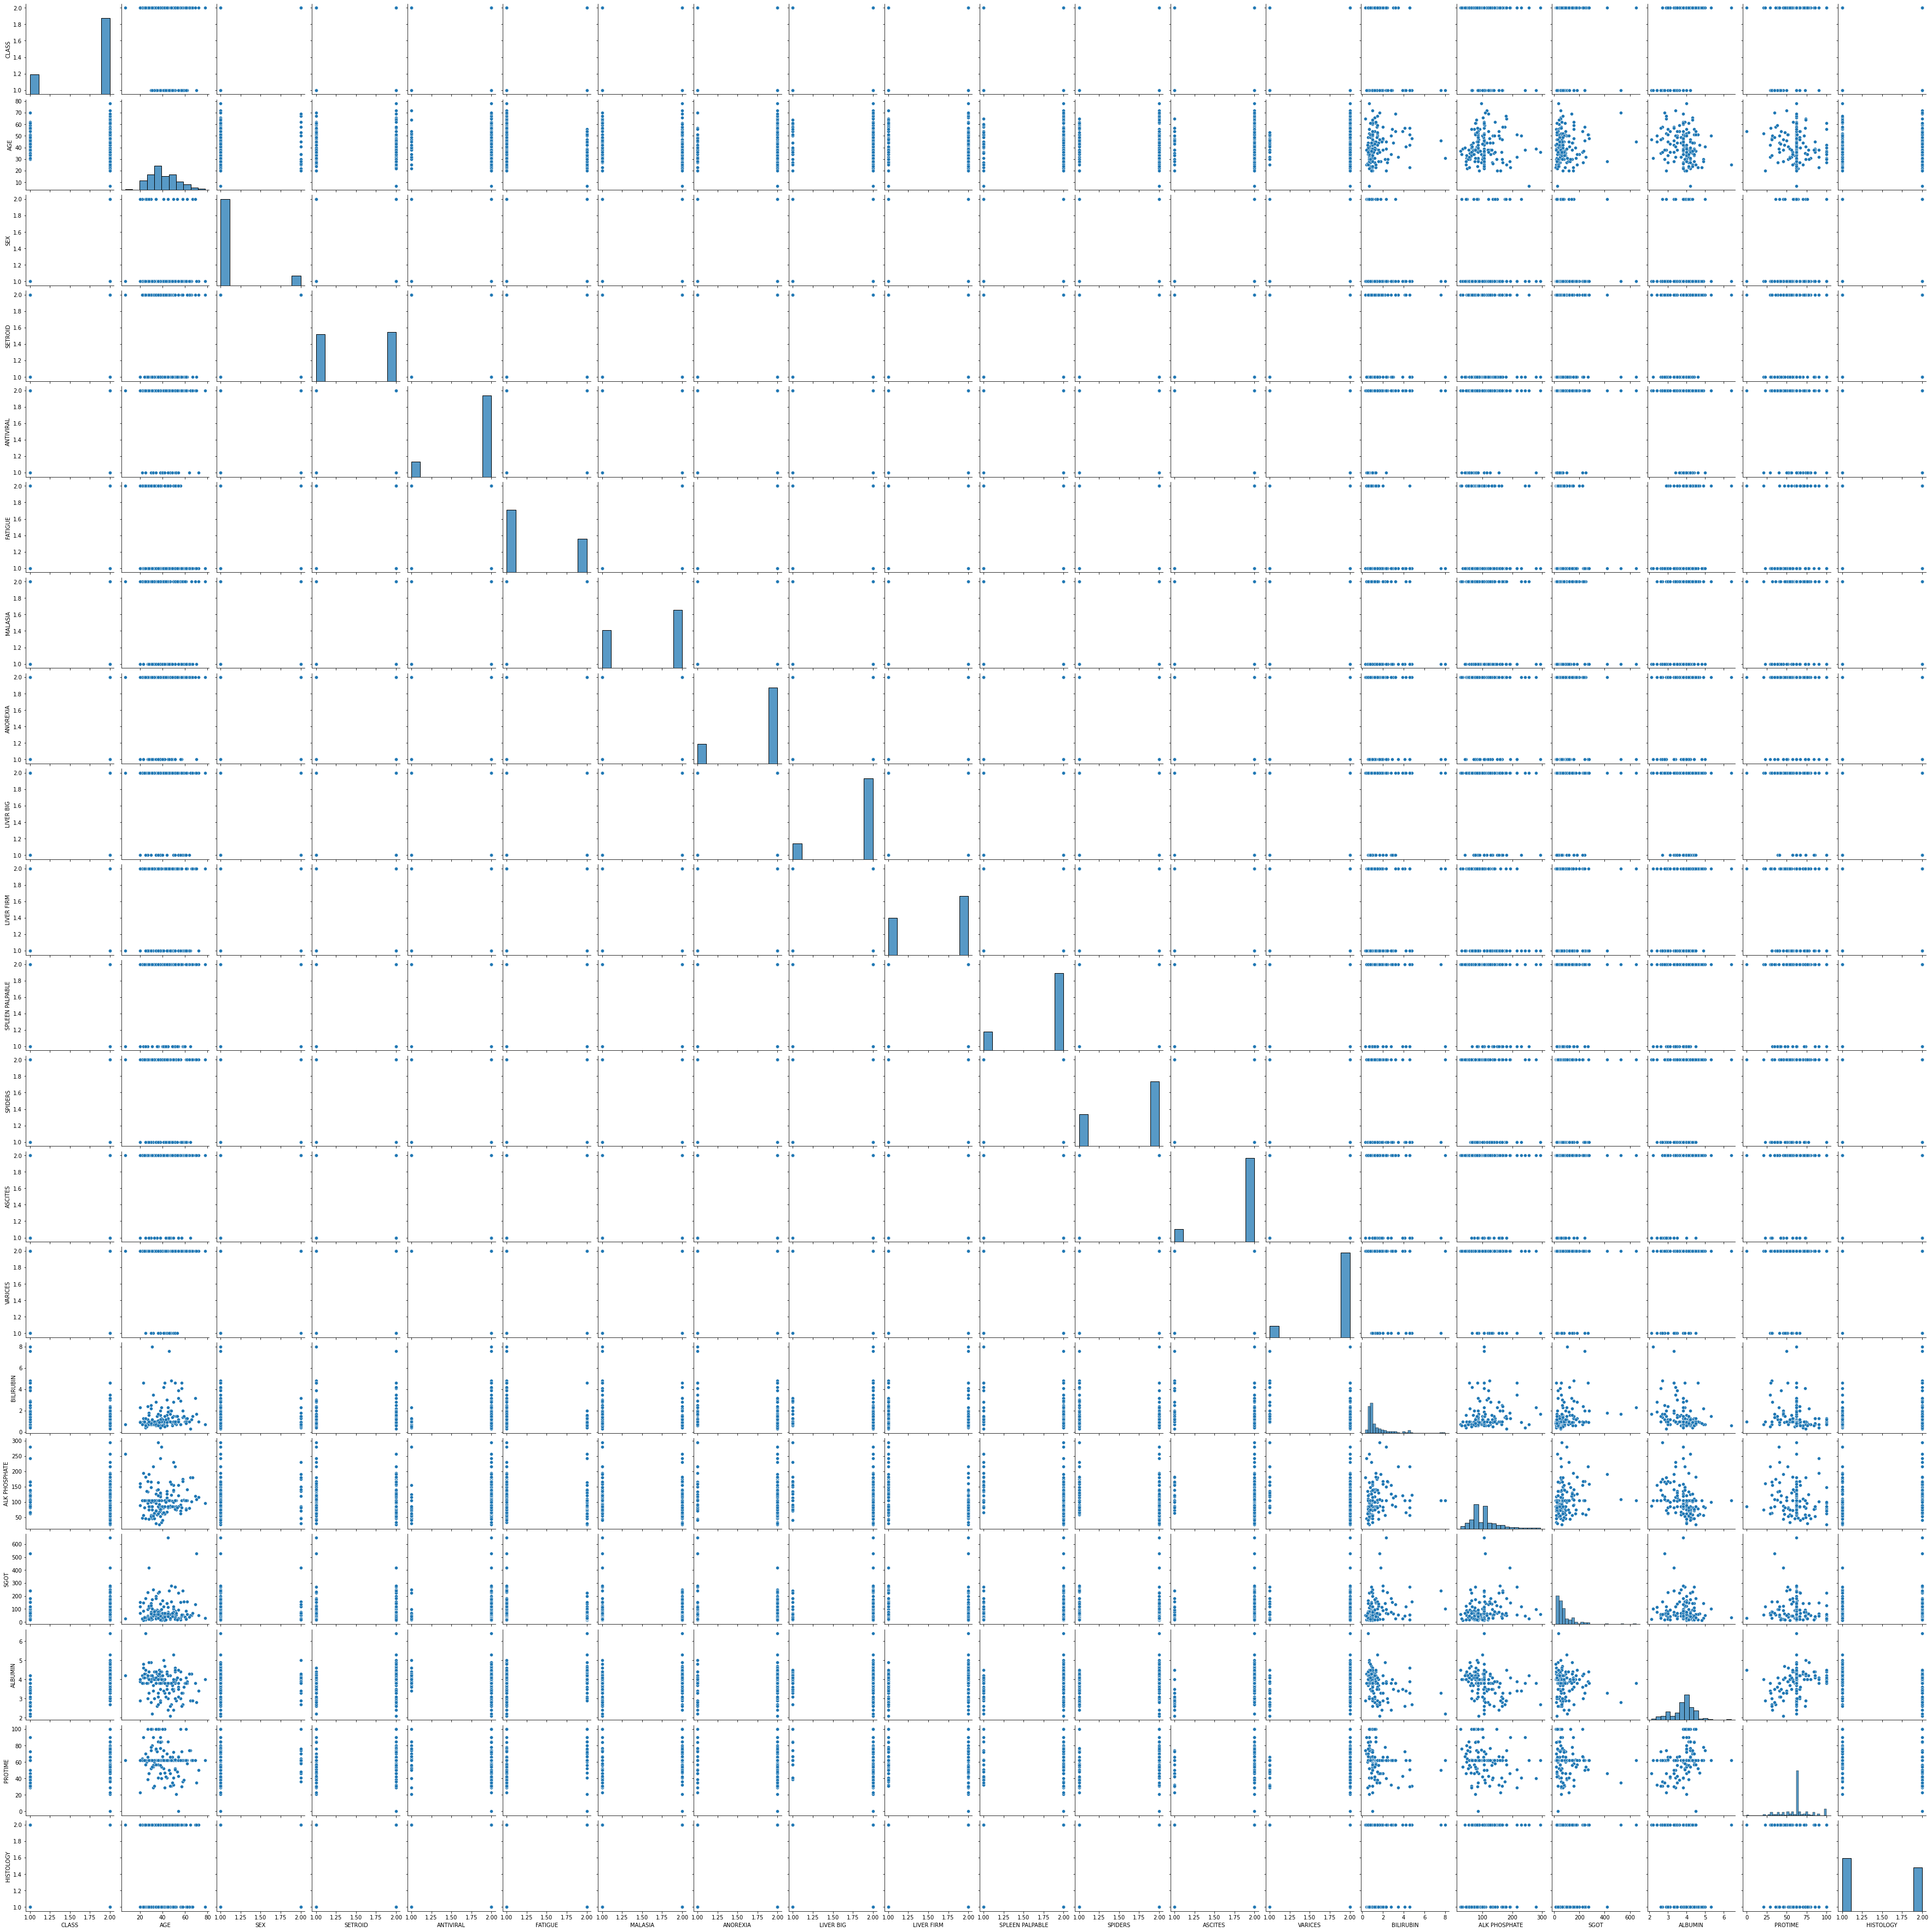

In [ ]:
import seaborn as sns
sns.pairplot(dataset)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


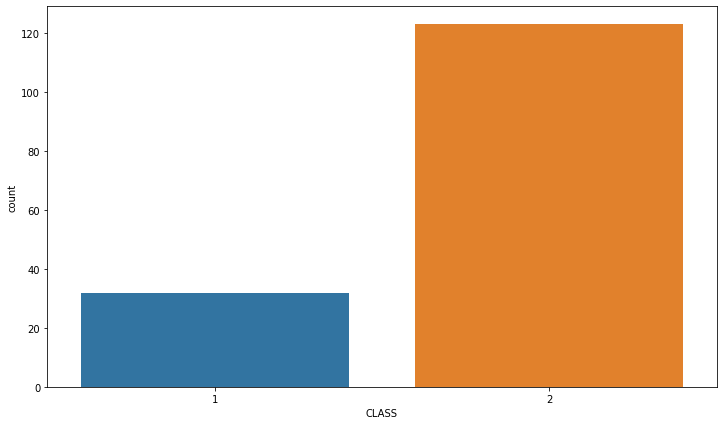

In [ ]:
plt.figure(figsize=(12,7))
sns.countplot(dataset['CLASS'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


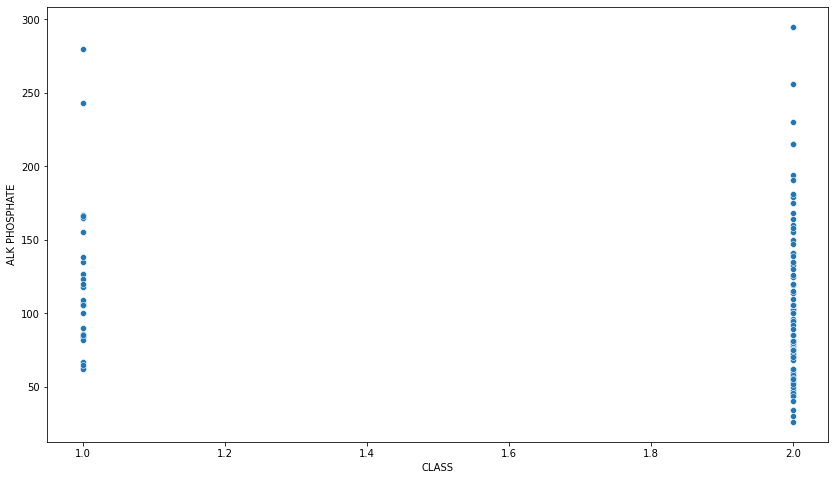

In [ ]:
plt.figure(figsize=(14,8))
sns.scatterplot(dataset['CLASS'],dataset['ALK PHOSPHATE'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


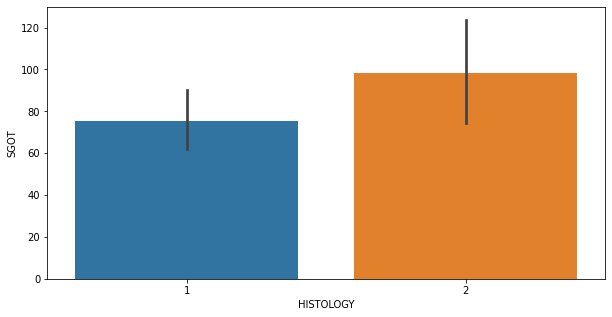

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(dataset['HISTOLOGY'],dataset['SGOT'])
plt.show()

In [ ]:
correlation=dataset.corr()


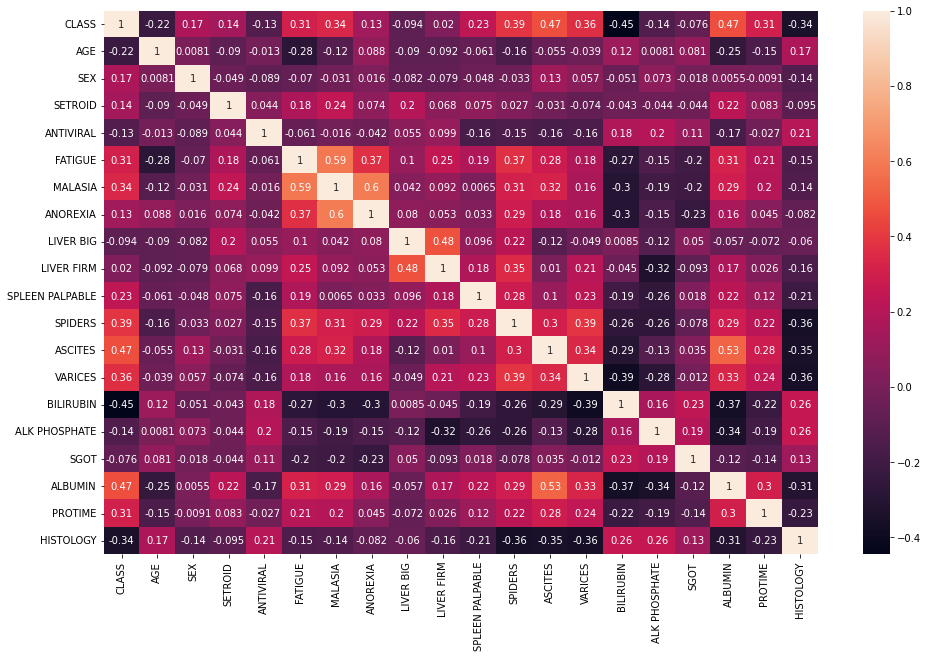

In [ ]:
plt.figure(figsize=(16,10))
sns.heatmap(correlation, annot=True)
plt.show()


In [ ]:
dataset.corr()

,CLASS,AGE,SEX,SETROID,ANTIVIRAL,FATIGUE,MALASIA,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
CLASS,1.000000,-0.219647,0.173051,0.137413,-0.130196,0.306049,0.339530,0.133638,-0.093665,0.020057,0.234261,0.389137,0.469334,0.362385,-0.445012,-0.141005,-0.075579,0.465827,0.307238,-0.337856
AGE,-0.219647,1.000000,0.008126,-0.090466,-0.013100,-0.278701,-0.117876,0.088317,-0.089629,-0.092001,-0.061277,-0.156545,-0.055314,-0.039229,0.115205,0.008076,0.081052,-0.246169,-0.153312,0.170780
SEX,0.173051,0.008126,1.000000,-0.048985,-0.089249,-0.070059,-0.030523,0.015886,-0.081830,-0.078642,-0.048478,-0.033192,0.130587,0.056792,-0.051354,0.073253,-0.017625,0.005459,-0.009125,-0.137450
SETROID,0.137413,-0.090466,-0.048985,1.000000,0.043961,0.175451,0.240139,0.073644,0.201478,0.068376,0.074816,0.027290,-0.031046,-0.073548,-0.043113,-0.044223,-0.044154,0.216697,0.083434,-0.095367
ANTIVIRAL,-0.130196,-0.013100,-0.089249,0.043961,1.000000,-0.061339,-0.016251,-0.042072,0.054746,0.099213,-0.164548,-0.147909,-0.164747,-0.155148,0.181197,0.197594,0.107876,-0.165443,-0.027317,0.209242
FATIGUE,0.306049,-0.278701,-0.070059,0.175451,-0.061339,1.000000,0.589030,0.372957,0.099759,0.247505,0.186846,0.367948,0.281439,0.180511,-0.272476,-0.148708,-0.199808,0.311757,0.208021,-0.146579
MALASIA,0.339530,-0.117876,-0.030523,0.240139,-0.016251,0.589030,1.000000,0.600545,0.041697,0.091832,0.006470,0.307173,0.320228,0.161422,-0.300650,-0.194920,-0.202801,0.290698,0.200760,-0.144667
ANOREXIA,0.133638,0.088317,0.015886,0.073644,-0.042072,0.372957,0.600545,1.000000,0.079685,0.052781,0.032536,0.287366,0.184053,0.163378,-0.298684,-0.153634,-0.234824,0.155587,0.045235,-0.081623
LIVER BIG,-0.093665,-0.089629,-0.081830,0.201478,0.054746,0.099759,0.041697,0.079685,1.000000,0.479779,0.095959,0.215566,-0.116465,-0.049453,0.008483,-0.124201,0.050390,-0.057149,-0.071565,-0.060262
LIVER FIRM,0.020057,-0.092001,-0.078642,0.068376,0.099213,0.247505,0.091832,0.052781,0.479779,1.000000,0.180607,0.345553,0.010196,0.208047,-0.045090,-0.323892,-0.092868,0.174551,0.026348,-0.157118


**INDEPENDENT AND DEPENDENT VARIABLES**

In [ ]:
x=dataset.drop(['CLASS'],axis=1)
y=dataset['CLASS']

In [ ]:
x

,AGE,SEX,SETROID,ANTIVIRAL,FATIGUE,MALASIA,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,30,2,1.0,2,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,85.000000,18.0,4.0,61.852273,1
1,50,1,1.0,2,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,0.9,135.000000,42.0,3.5,61.852273,1
2,78,1,2.0,2,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,96.000000,32.0,4.0,61.852273,1
3,31,1,2.0,1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,46.000000,52.0,4.0,80.000000,1
4,34,1,2.0,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,105.325397,200.0,4.0,61.852273,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,46,1,2.0,2,1.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,7.6,105.325397,242.0,3.3,50.000000,2
151,44,1,2.0,2,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,0.9,126.000000,142.0,4.3,61.852273,2
152,61,1,1.0,2,1.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,0.8,75.000000,20.0,4.1,61.852273,2
153,53,2,1.0,2,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.5,81.000000,19.0,4.1,48.000000,2


In [ ]:
y

0      2
1      2
2      2
3      2
4      2
      ..
150    1
151    2
152    2
153    2
154    1
Name: CLASS, Length: 155, dtype: int64

**TRAIN AND TEST FIT**

In [ ]:
from sklearn.model_selection import train_test_split 

x1_train,x1_test,y1_train,y1_test=train_test_split(x,y,test_size=0.20,train_size=0.80)
x2_train,x2_test,y2_train,y2_test=train_test_split(x,y,test_size=0.25,train_size=0.75)
x3_train,x3_test,y3_train,y3_test=train_test_split(x,y,test_size=0.30,train_size=0.70)
x4_train,x4_test,y4_train,y4_test=train_test_split(x,y,test_size=0.35,train_size=0.65)
x5_train,x5_test,y5_train,y5_test=train_test_split(x,y,test_size=0.40,train_size=0.60)




**MODEL** **FIT**

In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(fit_intercept=True)
model.fit(x1_train,y1_train)
model.fit(x2_train,y2_train)
model.fit(x3_train,y3_train)
model.fit(x4_train,y4_train)
model.fit(x5_train,y5_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LogisticRegression()

In [ ]:
y1_pred=model.predict(x1_test)
y2_pred=model.predict(x2_test)
y3_pred=model.predict(x3_test)
y4_pred=model.predict(x4_test)
y5_pred=model.predict(x5_test)

In [ ]:
y1_pred

array([2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2])

In [ ]:
y2_pred

array([2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2])

In [ ]:
y3_pred


array([2, 1, 2, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2])

In [ ]:
y4_pred

array([2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
y5_pred

array([2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2])

**ACCURACY**

Classification accuracy is a metric that summarizes the performance of a classification model as the number of correct predictions divided by the total number of predictions. It is easy to calculate and intuitive to understand, making it the most common metric used for evaluating classifier models.

 Informally, accuracy is the fraction of predictions our model got right.

In [ ]:
#accuracy
accuracy_1 = print(model.score(x1_test,y1_test))
accuracy_2 = print(model.score(x2_test,y2_test))
accuracy_3 = print(model.score(x3_test,y3_test))
accuracy_4 = print(model.score(x4_test,y4_test))
accuracy_5 = print(model.score(x5_test,y5_test))

0.8709677419354839
0.8717948717948718
0.8297872340425532
0.8727272727272727
0.7741935483870968


In [ ]:
x=dataset.drop(['CLASS'],axis=1)
y=dataset['CLASS']

In [ ]:
x_train,x_test, y_train, y_test=train_test_split(x, y,test_size= 0.5)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(77, 19)
(77,)
(78, 19)
(78,)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier

In [ ]:
DecisionTree = DecisionTreeClassifier()
DecisionTree.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = DecisionTree.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
print(classification_report(y_test, y_pred))
print('*'*55)
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.58      0.65      0.61        17
           2       0.90      0.87      0.88        61

    accuracy                           0.82        78
   macro avg       0.74      0.76      0.75        78
weighted avg       0.83      0.82      0.82        78

*******************************************************
[[11  6]
 [ 8 53]]


#**RANDOM** **FOREST**

Random forest solves the issue of overfitting which occurs in decision trees. One limitation of Random forest is, too many trees can make the processing of the algorithm slow thereby making it ineffective for prediction on real-time data. Random forest algorithm is a very powerful algorithm with high accuracy.

In [ ]:
randomforest = RandomForestClassifier(n_estimators=9, max_depth=5, min_samples_split=3, max_leaf_nodes=11)
randomforest.fit(x_train, y_train)

RandomForestClassifier(max_depth=5, max_leaf_nodes=11, min_samples_split=3,
                       n_estimators=9)

In [ ]:
y_pred = randomforest.predict(x_test)

In [ ]:
print(classification_report(y_test, y_pred))
print('*'*55)
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.77      0.59      0.67        17
           2       0.89      0.95      0.92        61

    accuracy                           0.87        78
   macro avg       0.83      0.77      0.79        78
weighted avg       0.87      0.87      0.87        78

*******************************************************
[[10  7]
 [ 3 58]]


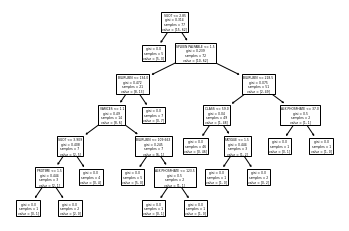

In [ ]:
plot_tree(DecisionTree, feature_names =["CLASS","AGE","SEX","SETROID","ANTIVIRAL","FATIGUE","MALASIA","ANOREXIA","LIVER BIG","LIVER FIRM",
                                                   "SPLEEN PALPABLE","SPIDERS","ASCITES","VARICES","BILIRUBIN","ALK PHOSPHATE","SGOT","ALBUMIN",
                                                   "PROTIME","HISTOLOGY"])
plt.savefig('out.pdf')